# Gendered Reception of Politicians in Online Political Discourse

### Computational Social Sciences

**Authors:** BELLAIS Salome, GONZALEZ DARDIK Micaela Natali, MARCULESCU Tudor, RODRIGUEZ Miguel, VIELLARD Mathilde.
**Course:** Computational Social Sciences (2025–2026)

---

## Abstract

Online social media platforms are key arenas for political debate, shaping public perception of political figures. While prior research highlights that female politicians often face different forms of evaluation and criticism than their male counterparts—frequently involving gendered language and personal attacks—data availability can limit broad generalizations.

In this project, we focus on the online reception of selected French political figures, primarily Marine Le Pen and Emmanuel Macron, with additional data on a male politician from a similar ideological background. Using computational methods, we analyze textual content and interaction patterns on Twitter to examine differences in sentiment, toxicity, thematic focus, and network dynamics.

By combining natural language processing techniques with graph-based analysis, this study investigates how gender and political alignment intersect in shaping online discourse, while explicitly acknowledging the methodological and ethical limitations inherent in computational social science approaches.

## 1. Introduction

Social media platforms play a central role in contemporary political communication, allowing direct interaction between political figures and the public. While these platforms can foster political engagement, they also expose public figures to large volumes of unmoderated commentary, including harassment and hate speech.

Gender bias in political communication has been documented in traditional media, where women are often evaluated based on personal attributes rather than political positions. Online platforms introduce additional dynamics such as anonymity, virality, and network effects, which may amplify these biases.

In this project, we focus on the online reception of selected French political figures, primarily Marine Le Pen and Emmanuel Macron, with additional data on a male politician from a similar ideological background. Using computational tools, we aim to systematically analyze large-scale online discourse and examine how gender and political alignment intersect in shaping public perception and online commentary.

## 2. Research Question and Hypotheses

### Research Question

How does the online reception of Marine Le Pen differ from that of Emmanuel Macron on Twitter, and to what extent can observed differences be associated with gender versus political alignment?

### Sub-questions

- Are tweets referring to Marine Le Pen more negative or toxic than those referring to Emmanuel Macron?  
- Do the dominant topics differ between discussions about these politicians?  
- Are gendered or personal themes (e.g. appearance, legitimacy, personal life) more prevalent in tweets about Marine Le Pen?  
- How does the reception of Marine Le Pen compare to that of a male politician from a similar ideological background?

### Hypotheses

- **H1:** Tweets referring to Marine Le Pen exhibit higher levels of toxicity and personal attacks than those referring to Emmanuel Macron.  
- **H2:** Topic modeling reveals gender-specific themes, with tweets about Marine Le Pen more frequently referencing appearance or personal attributes.  
- **H3:** Differences in toxicity and interaction patterns persist, though are partially reduced, when comparing Marine Le Pen to a male politician from a similar political orientation.

## 3. Methodological Overview

To address our research question, we adopt a computational approach combining text analysis and network analysis on Twitter data referring to selected French political figures, primarily Marine Le Pen and Emmanuel Macron, with additional data on a male politician from a similar ideological background.

### Methods

- **Natural Language Processing (NLP):**
  - Text preprocessing (tokenization, cleaning, and normalization)
  - Sentiment and toxicity classification using pre-trained models
  - Topic modeling to identify dominant themes in tweets

- **Graph Analysis:**
  - Construction of reply and interaction networks
  - Analysis of centrality, clustering, and coordination patterns among users
  - Comparison of interaction patterns across politicians to detect potential gendered or ideological clustering

### Computational Social Science Perspective

While computational methods allow large-scale analysis, they are not neutral. Pre-trained NLP models may encode social biases, and network structures may reflect platform-specific affordances. Our analysis explicitly considers these limitations, especially given the restricted scope of the dataset and the overlap between gender and political alignment.


In [1]:
import sys
sys.executable

# INSTALL ALL OF THIS LIBRARIES BEFORE RUNNING THE CODE
# %pip install pandas numpy matplotlib seaborn nltk scikit-learn networkx transformers torch wordcloud textblob kagglehub

'c:\\Users\\micag\\anaconda3\\envs\\css_full\\python.exe'

In [4]:
#!pip install pandas numpy matplotlib seaborn nltk scikit-learn networkx transformers torch wordcloud textblob kagglehub detoxify
!pip install detoxify

# Basic libraries
import pandas as pd
import numpy as np
import sqlite3
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Topic modeling
from sklearn.decomposition import LatentDirichletAllocation

# Graphs
import networkx as nx

# Utils
from collections import Counter

# Kagglehub for dataset download
import kagglehub

# install torch and after, transformers
import torch
from transformers import pipeline
import detoxify

print("Environment ready")

Environment ready


In [5]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\micag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\micag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 4. Data Sources

Due to access restrictions and recent changes in the Twitter/X API, this project relies on **publicly available datasets** from Kaggle. The data consists of tweets referring to selected French political figures, primarily Marine Le Pen and Emmanuel Macron, with additional tweets about a male politician from a similar ideological background.

Each observation includes textual content and basic interaction metadata, enabling both linguistic analysis (sentiment, toxicity, topics) and network-based analysis (reply and interaction structures). 

Using open datasets ensures reproducibility, transparency, and ethical compliance, while still allowing us to study real-world political discourse at scale.

In [ ]:
###### HERE WOULD GO ALL THE SCRAPING AND SENTIMENTAL ANALYSIS CODE ######
## I'M NOT GOING TO INCLUDE IT NOW, AS IT'S ALREADY SAVED IN CSV FILES ##
#######################################################################

## 5. Data Analysis Overview

We use the preprocessed dataset created by our collaborator, which contains tweets mentioning Marine Le Pen, Emmanuel Macron, and a male politician from a similar ideological background.  

The dataset already includes:  
- Cleaned text  
- Sentiment labels and scores  
- Toxicity metrics (from Detoxify and VADER models)  
- Metadata such as timestamp and target politician  

This allows us to focus on comparing online reception between politicians without redoing the initial NLP preprocessing or scraping.


In [ ]:
df_sin_sent = pd.read_csv("le_pen_macron_twitter_2017_2022.csv")
df_sin_sent["timestamp"] = pd.to_datetime(df_sin_sent["timestamp"], errors='coerce', format="%Y-%m-%d %H:%M:%S")
df = pd.read_csv("le_pen_macron_twitter_2017_2022_toxicity.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], errors='coerce', format="%Y-%m-%d %H:%M:%S")
df.head()
df.info()
df['target_politician'].value_counts()
df['sentiment'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816915 entries, 0 to 816914
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   comment_id         816915 non-null  int64         
 1   text               816915 non-null  object        
 2   target_politician  816915 non-null  object        
 3   gender             816915 non-null  object        
 4   timestamp          816915 non-null  datetime64[ns]
 5   reply_to           0 non-null       float64       
 6   clean_text         816911 non-null  object        
 7   text_length        816915 non-null  int64         
 8   sentiment          816915 non-null  object        
 9   sentiment_score    816915 non-null  float64       
 10  toxicity           816915 non-null  float64       
 11  severe_toxicity    816915 non-null  float64       
 12  obscene            816915 non-null  float64       
 13  threat             816915 non-null  float64 

In [50]:
df

,comment_id,text,target_politician,gender,timestamp,reply_to,clean_text,text_length,sentiment,sentiment_score,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
0,2066830,RT @ZelenskyyUa: Continued talks with 🇫🇷 Presi...,Emmanuel Macron,M,2022-04-01 13:24:45,NaN,rt zelenskyyua continued talks president emman...,140,NEGATIVE,0.839275,0.001135,0.000103,0.000185,0.000118,0.000173,0.000164
1,6006473,RT @LenoirSeb: Les seules excuses que @Emmanue...,Emmanuel Macron,M,2022-02-19 16:20:12,NaN,rt lenoirseb les seules excuses que emmanuelma...,140,NEGATIVE,0.975356,0.083492,0.000209,0.002052,0.000563,0.002093,0.000959
2,12398862,@Ambroise_Mejean @EmmanuelMacron Ridicule,Emmanuel Macron,M,2022-01-26 22:51:08,NaN,ambroisemejean emmanuelmacron ridicule,41,NEGATIVE,0.993979,0.046182,0.000160,0.000811,0.000284,0.001327,0.000670
3,6830953,RT @PascalNocera: Encore une provocation enver...,Emmanuel Macron,M,2022-03-16 07:07:25,NaN,rt pascalnocera encore une provocation envers ...,139,NEGATIVE,0.970950,0.019319,0.000128,0.000817,0.000289,0.000665,0.000410
4,11876809,"@FdeRugy @EmmanuelMacron Dis donc, tu ne cherc...",Emmanuel Macron,M,2022-03-03 21:35:35,NaN,fderugy emmanuelmacron dis donc tu ne chercher...,111,NEGATIVE,0.754623,0.203002,0.000398,0.007997,0.000925,0.004063,0.001317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816910,5389790,RT @jo_talleyrand: @BrenierLaura @EmmanuelMacr...,Emmanuel Macron,M,2021-11-11 12:55:49,NaN,rt jotalleyrand brenierlaura emmanuelmacron an...,140,NEGATIVE,0.869301,0.015304,0.000129,0.000649,0.000245,0.000738,0.000410
816911,8285352,RT @__Verlaine__: Baromètre #OpinionWay pour @...,Emmanuel Macron,M,2022-03-21 08:48:23,NaN,rt verlaine baromtre opinionway pour cnews dvo...,140,NEGATIVE,0.786647,0.007635,0.000103,0.000486,0.000166,0.000390,0.000229
816912,15930193,@NaudinChristoph @LarrereMathilde @debatdecole...,Marine Le Pen,F,2022-03-05 09:46:32,NaN,naudinchristoph larreremathilde debatdecole jl...,281,NEGATIVE,0.974724,0.035160,0.000166,0.001452,0.000390,0.001225,0.000545
816913,11552203,@FoxNews @EmmanuelMacron @vonderleyen @eucopre...,Emmanuel Macron,M,2022-03-06 17:56:30,NaN,foxnews emmanuelmacron vonderleyen eucopreside...,285,NEGATIVE,0.972543,0.078330,0.000513,0.002330,0.001565,0.002446,0.009794


In [28]:
sns.set_theme(style="whitegrid")

palette = {
    'Emmanuel Macron': '#1f77b4',   # azul
    'Marine Le Pen': '#0b1c2d'       # azul oscuro
}


plt.rcParams.update({
    'font.family': 'serif',        # o 'sans-serif'
    'font.serif': ['Times New Roman'],  # o 'DejaVu Serif'
    'axes.titlesize': 13,
    'axes.titleweight': 'bold',
    'axes.labelsize': 11,
    'axes.labelweight': 'regular',
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.titlesize': 14
})

### HIPÓTESIS 1 parte 1 — Proporción de tweets negativos

C:\Users\micag\AppData\Local\Temp\ipykernel_32460\2223284792.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\micag\AppData\Local\Temp\ipykernel_32460\2223284792.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


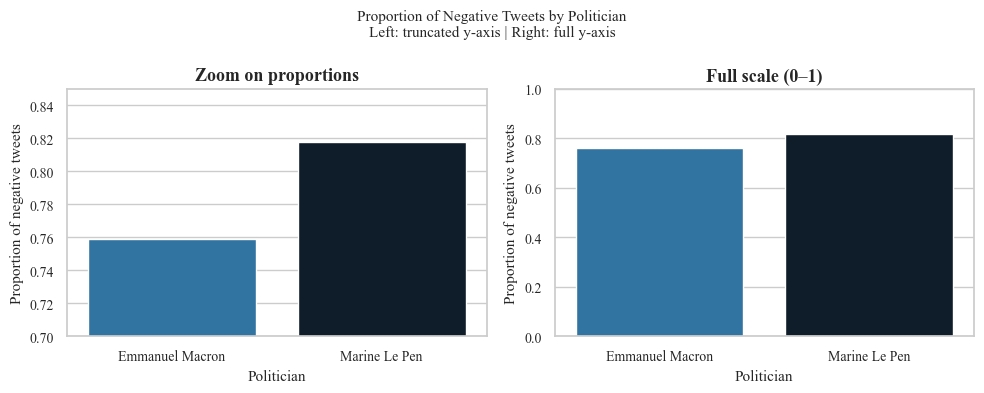

In [29]:
neg_prop = (
    df.assign(is_negative=df['sentiment'] == 'NEGATIVE')
      .groupby('target_politician')['is_negative']
      .mean()
      .reset_index()
)

neg_prop

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=False)

# --- Gráfico 1: eje truncado (zoom) ---
sns.barplot(
    data=neg_prop,
    x='target_politician',
    y='is_negative',
    palette=palette,
    ax=axes[0]
)
axes[0].set_ylim(0.70, 0.85)
axes[0].set_title('Zoom on proportions')
axes[0].set_ylabel('Proportion of negative tweets')
axes[0].set_xlabel('Politician')

# --- Gráfico 2: escala completa (0 a 1) ---
sns.barplot(
    data=neg_prop,
    x='target_politician',
    y='is_negative',
    palette=palette,
    ax=axes[1]
)
axes[1].set_ylim(0, 1)
axes[1].set_title('Full scale (0–1)')
axes[1].set_ylabel('Proportion of negative tweets')
axes[1].set_xlabel('Politician')

plt.suptitle(
    'Proportion of Negative Tweets by Politician\n'
    'Left: truncated y-axis | Right: full y-axis',
    fontsize=11
)

plt.tight_layout()
plt.show()

C:\Users\micag\AppData\Local\Temp\ipykernel_32460\1747916481.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\micag\AppData\Local\Temp\ipykernel_32460\1747916481.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


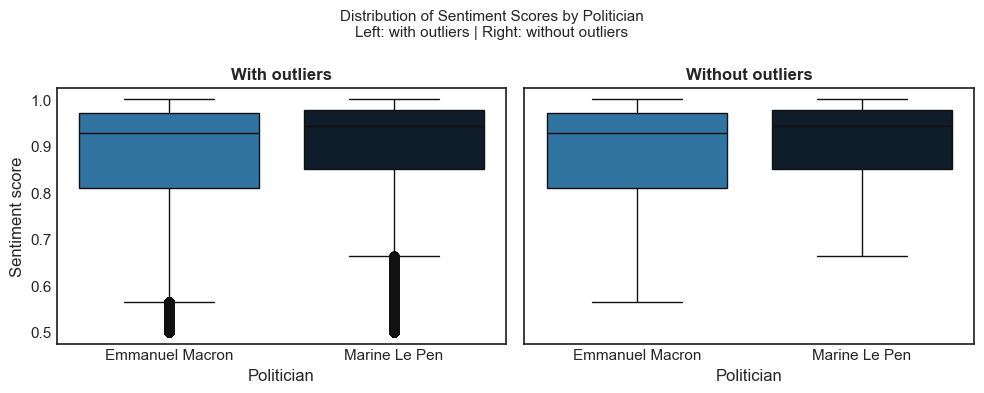

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# --- Gráfico 1: con outliers ---
sns.boxplot(
    data=df,
    x='target_politician',
    y='sentiment_score',
    palette=palette,
    ax=axes[0]
)
axes[0].set_title('With outliers')
axes[0].set_ylabel('Sentiment score')
axes[0].set_xlabel('Politician')

# --- Gráfico 2: sin outliers ---
sns.boxplot(
    data=df,
    x='target_politician',
    y='sentiment_score',
    palette=palette,
    showfliers=False,
    ax=axes[1]
)
axes[1].set_title('Without outliers')
axes[1].set_ylabel('')
axes[1].set_xlabel('Politician')

plt.suptitle(
    'Distribution of Sentiment Scores by Politician\n'
    'Left: with outliers | Right: without outliers',
    fontsize=11
)

plt.tight_layout()
plt.show()


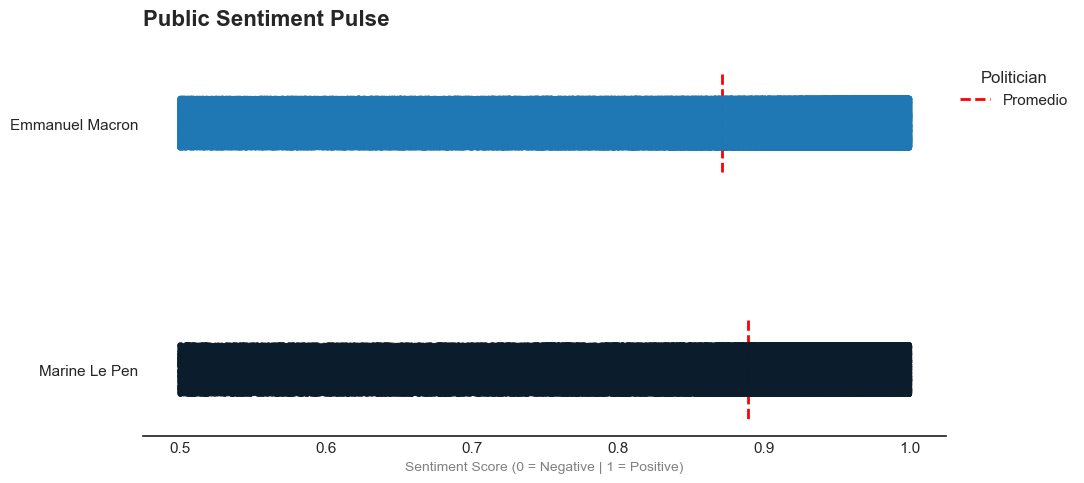

In [41]:
# Configuramos el lienzo con un fondo oscuro o muy limpio
plt.figure(figsize=(11, 5))
sns.set_style("white")

# El Swarm plot coloca cada punto sin solaparlos, creando una "forma" orgánica
ax = sns.stripplot(
    data=df, 
    x='sentiment_score', 
    y='target_politician', 
    hue='target_politician',
    palette=palette,
    size=4, 
    alpha=0.7,
    jitter=True, # Esto hace que parezca una nube de puntos orgánica
    orient='h'    # Horizontal para que sea más fácil de leer como una línea de tiempo
)

# Añadimos una línea que marque el "Promedio" para dar contexto rápido
for i, politician in enumerate(df['target_politician'].unique()):
    avg = df[df['target_politician'] == politician]['sentiment_score'].mean()
    plt.vlines(avg, i - 0.2, i + 0.2, color='red', linestyle='--', lw=2, label='Promedio' if i == 0 else "")

# Modern Aesthetics: removing frames and keeping only the essentials
plt.title('Public Sentiment Pulse\n', fontsize=16, fontweight='bold', loc='left')
plt.xlabel('Sentiment Score (0 = Negative | 1 = Positive)', fontsize=10, color='gray')
plt.ylabel('')

# Update legend and clean layout
plt.legend(title='Politician', bbox_to_anchor=(1, 1), frameon=False)
sns.despine(left=True, bottom=False)

plt.tight_layout()
plt.show()

### Hipotesis 2 - Longitud del tweet (personalización)

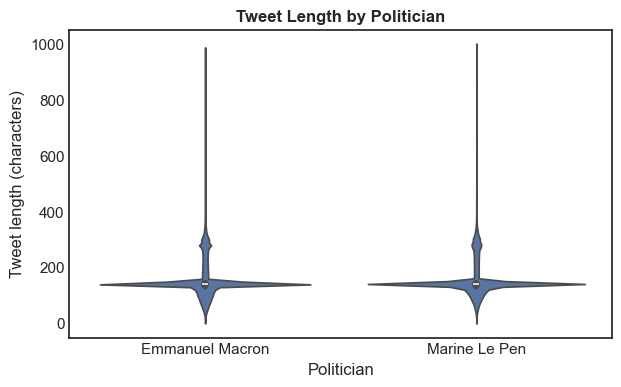

In [49]:
df['text_length'] = df['text'].str.len()
df.groupby('target_politician')['text_length'].mean()


plt.figure(figsize=(7,4))
sns.violinplot(
    data=df,
    x='target_politician',
    y='text_length'
)
ax.set_ylim(0, 280)

plt.ylabel('Tweet length (characters)')
plt.xlabel('Politician')
plt.title('Tweet Length by Politician')
plt.show()

